In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv");
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
mean = np.mean(df['bmi'])    
print("Ο μέσος όρος:", mean)

df['bmi'].fillna(mean,inplace=True)
df


Ο μέσος όρος: 28.893236911794666


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [14]:
#Ίσως η πρώτη κολώνα (id) να μην μας χρησιμεύσει 

df = df.drop(columns='id')


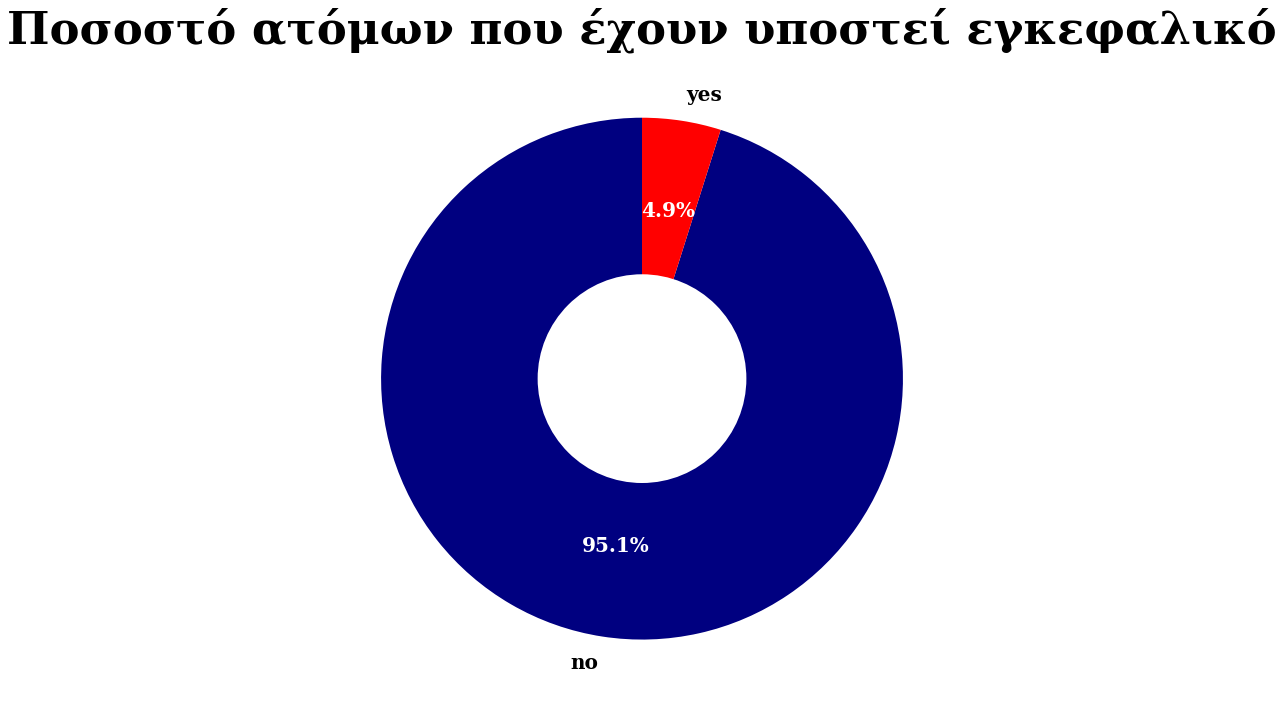

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns

pie_colors = ('navy', 'red')

pred_classes = df.stroke.value_counts()

plt.figure(figsize=(17, 12))
patches, texts, pcts = plt.pie(pred_classes,
                               labels=['no', 'yes'],
                               colors=pie_colors,
                               pctdistance=0.65,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 20,
                                          'color': 'black',
                                          'weight': 'bold',
                                          'family': 'serif'})
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Ποσοστό ατόμων που έχουν υποστεί εγκεφαλικό', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

[Text(0, 0, 'Male'), Text(0, 0, 'Female'), Text(0, 0, 'Other')]

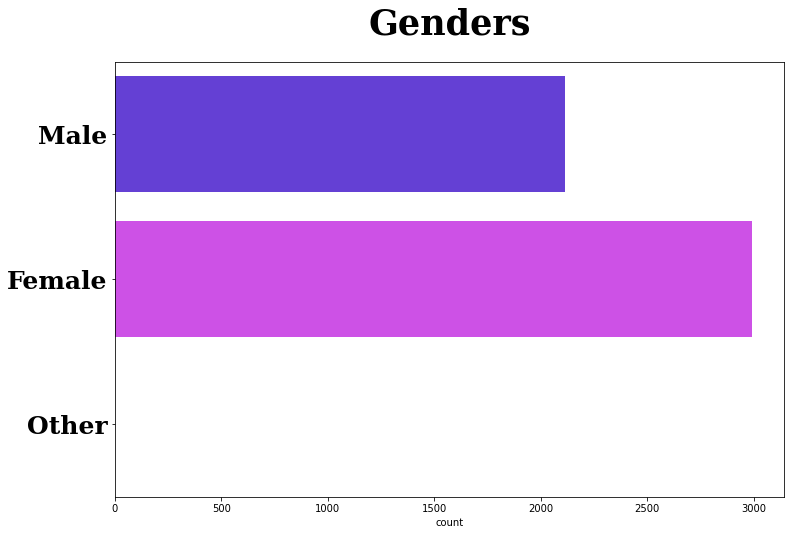

In [16]:
two_colors = ['#dd38ff', '#5727ed']

plt.figure(figsize=(12, 8))
gender_plot = sns.countplot(y=df.gender, palette=two_colors[::-1])
gender_plot.set_title('Genders', fontsize=35, y=1.05, **hfont)
gender_plot.set(ylabel=None)
plt.grid(False)
gender_plot.set_yticklabels(gender_plot.get_yticklabels(), size=25, **hfont)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


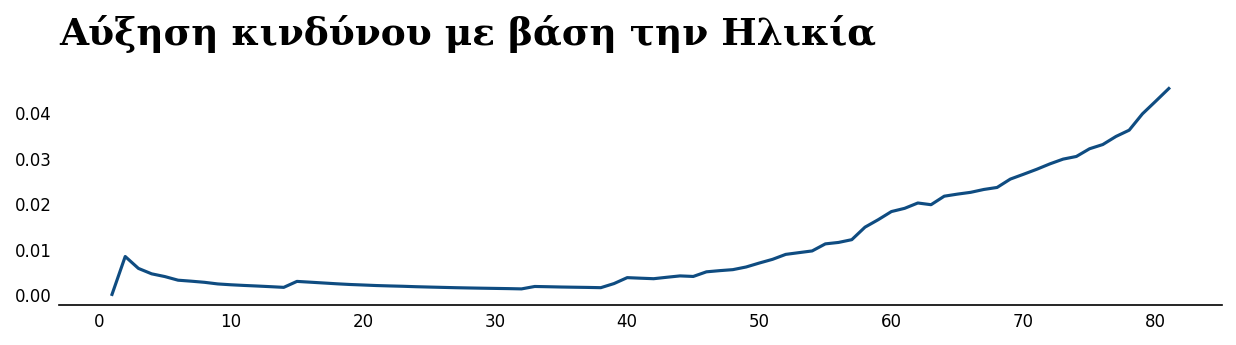

In [17]:


fig = plt.figure(figsize=(10, 5), dpi=150,facecolor="white")
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor('white')

df['age'] = df['age'].astype(int)

rate = []
for i in range(df['age'].min(), df['age'].max()):
    rate.append(df[df['age'] < i]['stroke'].sum() / len(df[df['age'] < i]['stroke']))

sns.lineplot(data=rate,color='#0f4c81',ax=ax0)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(-3,0.055,'Αύξηση κινδύνου με βάση την Ηλικία',fontsize=18,fontfamily='serif',fontweight='bold')
# ax0.text(-3,0.047,'As age increase, so too does risk of having a stroke',fontsize=14,fontfamily='serif')


plt.show()

[Text(0, 0, 'Private'),
 Text(0, 0, 'Self-employed'),
 Text(0, 0, 'Govt_job'),
 Text(0, 0, 'children'),
 Text(0, 0, 'Never_worked')]

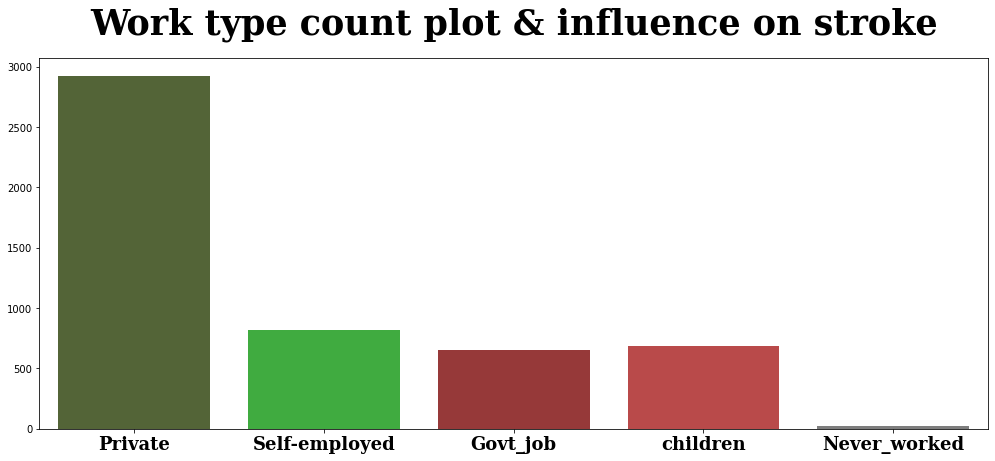

In [18]:
from matplotlib.gridspec import GridSpec

five_colors = ['#556b2f', '#2ebd2e', '#a52a2a', '#cc3737', '#7e7e7e']

fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
work_type_plot = sns.countplot(x=df.work_type, ax=ax1, palette=five_colors)
work_type_plot.set_title('Work type count plot &'
                         ' influence on stroke',
                         fontsize=35, y=1.05, **hfont)
work_type_plot.set(xlabel=None,
                   ylabel=None)
work_type_plot.set_xticklabels(work_type_plot.get_xticklabels(),
                                size=18, **hfont)

In [19]:
!pip install pywaffle
from pywaffle import Waffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.1 MB 19.8 MB/s 


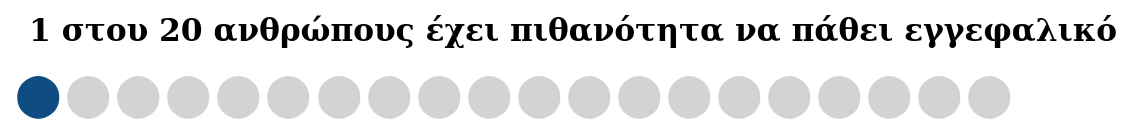

In [20]:
fig = plt.figure(figsize=(7, 2),dpi=150,facecolor='white',
    FigureClass=Waffle,
    rows=1,
    values=[1, 19],
    colors=['#0f4c81', "lightgray"],
    characters='⬤',
    font_size=20,vertical=True,
)

# fig.text(0.035,0.78,'People Affected by a Stroke in our dataset',fontfamily='serif',fontsize=15,fontweight='bold')
fig.text(0.035,0.65,'1 στου 20 ανθρώπους έχει πιθανότητα να πάθει εγγεφαλικό ',fontfamily='serif',fontsize=15,fontweight='bold')
 
plt.show()

# Modelling

In [21]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [22]:
from sklearn.preprocessing import LabelEncoder

df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['ever_married'] = LabelEncoder().fit_transform(df['ever_married'])
df['work_type'] = LabelEncoder().fit_transform(df['work_type'])
df['Residence_type'] = LabelEncoder().fit_transform(df['Residence_type'])
df['smoking_status'] = LabelEncoder().fit_transform(df['smoking_status'])

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.600000,1,1
1,0,61,0,0,1,3,0,202.21,28.893237,2,1
2,1,80,0,1,1,2,0,105.92,32.500000,2,1
3,0,49,0,0,1,2,1,171.23,34.400000,3,1
4,0,79,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51,0,0,1,2,0,166.29,25.600000,1,0


In [23]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

print('X Shape', x.shape)
print('Y Shape',y.shape)

X Shape (5110, 9)
Y Shape (5110,)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)


Training Score 0.961839530332681
Testing Score 
 0.9569471624266145
0.9569471624266145


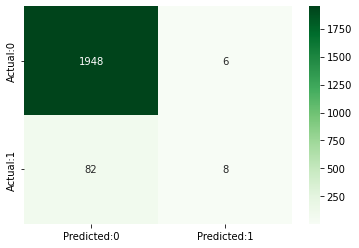

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)

model_score = model.score(X_train, y_train)
model_test = model.score(X_test, y_test)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('Training Score',model_score)
print('Testing Score \n',model_test)

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Greens");
print(accuracy_score(y_test,y_pred))

In [28]:
import pickle

pickle.dump(model, open('xgboost.pkl', 'wb'))